In [54]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier

In [55]:
df = pd.read_csv("parkinsons/parkinsons.data")
df.drop(columns=["name"], inplace=True)
df.columns

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [56]:
x = df.drop(columns=['status'])
y = df['status']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [57]:
x.head(2)

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674


In [58]:
svm = LinearSVC().fit(x_train, y_train)
y_pred = svm.predict(x_test)
acc_svm = accuracy_score(y_test, y_pred)
f1_svm = f1_score(y_test, y_pred)
recall_svm = recall_score(y_test, y_pred)
cm_svm = confusion_matrix(y_test, y_pred)
print(f'Accuracy: {acc_svm}')
print(f'f1_score: {f1_svm}')
print(f'recall_score: {recall_svm}')
print(f'confusion_matrix: \n{cm_svm}')

Accuracy: 0.8461538461538461
f1_score: 0.8888888888888888
recall_score: 0.8888888888888888
confusion_matrix: 
[[ 9  3]
 [ 3 24]]


In [59]:
rf = RandomForestClassifier().fit(x_train, y_train)
y_pred = rf.predict(x_test)
acc_rf = accuracy_score(y_test, y_pred)
f1_rf = f1_score(y_test, y_pred)
recall_rf = recall_score(y_test, y_pred)
cm_rf = confusion_matrix(y_test, y_pred)
print(f'Accuracy: {acc_rf}')
print(f'f1_score: {f1_rf}')
print(f'recall_score: {recall_rf}')
print(f'confusion_matrix: \n{cm_rf}')

Accuracy: 0.9487179487179487
f1_score: 0.9629629629629629
recall_score: 0.9629629629629629
confusion_matrix: 
[[11  1]
 [ 1 26]]


In [60]:
dtree = DecisionTreeClassifier().fit(x_train, y_train)
y_pred = dtree.predict(x_test)
acc_dtree = accuracy_score(y_test, y_pred)
f1_dtree = f1_score(y_test, y_pred)
recall_dtree = recall_score(y_test, y_pred)
cm_dtree = confusion_matrix(y_test, y_pred)
print(f'Accuracy: {acc_dtree}')
print(f'f1_score: {f1_dtree}')
print(f'recall_score: {recall_dtree}')
print(f'confusion_matrix: \n{cm_dtree}')

Accuracy: 0.7948717948717948
f1_score: 0.84
recall_score: 0.7777777777777778
confusion_matrix: 
[[10  2]
 [ 6 21]]


In [61]:
df['status'].value_counts()

status
1    147
0     48
Name: count, dtype: int64

In [62]:
df.shape

(195, 23)

In [63]:
df.shape

(195, 23)

In [64]:
import joblib
joblib.dump(svm, 'svm_model.pkl')

['svm_model.pkl']

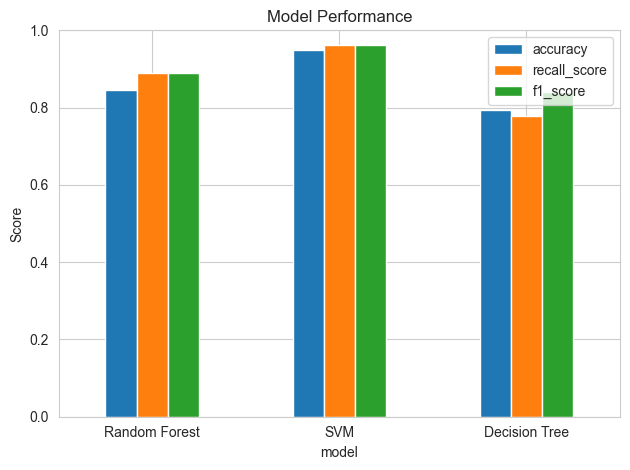

In [67]:
metrics = pd.DataFrame({
    "model": ["Random Forest", "SVM", "Decision Tree"],
    "accuracy": [acc_svm, acc_rf, acc_dtree],
    "recall_score": [recall_svm, recall_rf, recall_dtree],
    "f1_score": [f1_svm, f1_rf, f1_dtree],
})

metrics.plot(kind="bar", x="model")
plt.xticks(rotation=0)
plt.title("Model Performance")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

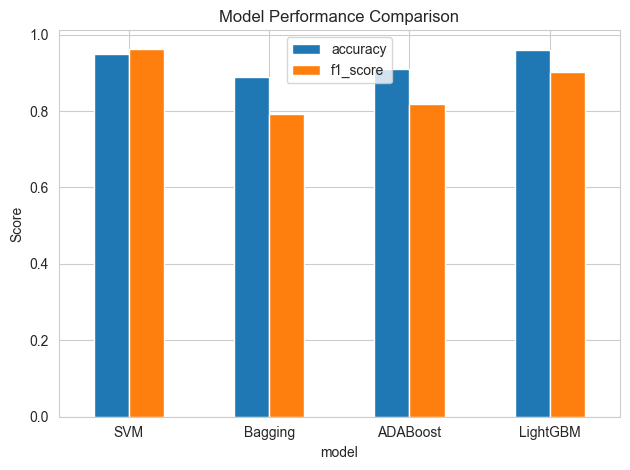

In [71]:
metric_compare = pd.DataFrame({
    "model": ["SVM", "Bagging", "ADABoost", "LightGBM"],
    "accuracy": [acc_rf, 0.8881, 0.91, 0.96],
    "f1_score": [f1_rf, 0.7919, 0.8182, 0.902],
})
metric_compare.plot(kind="bar", x="model")
plt.xticks(rotation=0)
plt.title("Model Performance Comparison")
plt.ylabel("Score")
# plt.ylim(0, 1)
plt.tight_layout()
plt.show()

             name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.0654

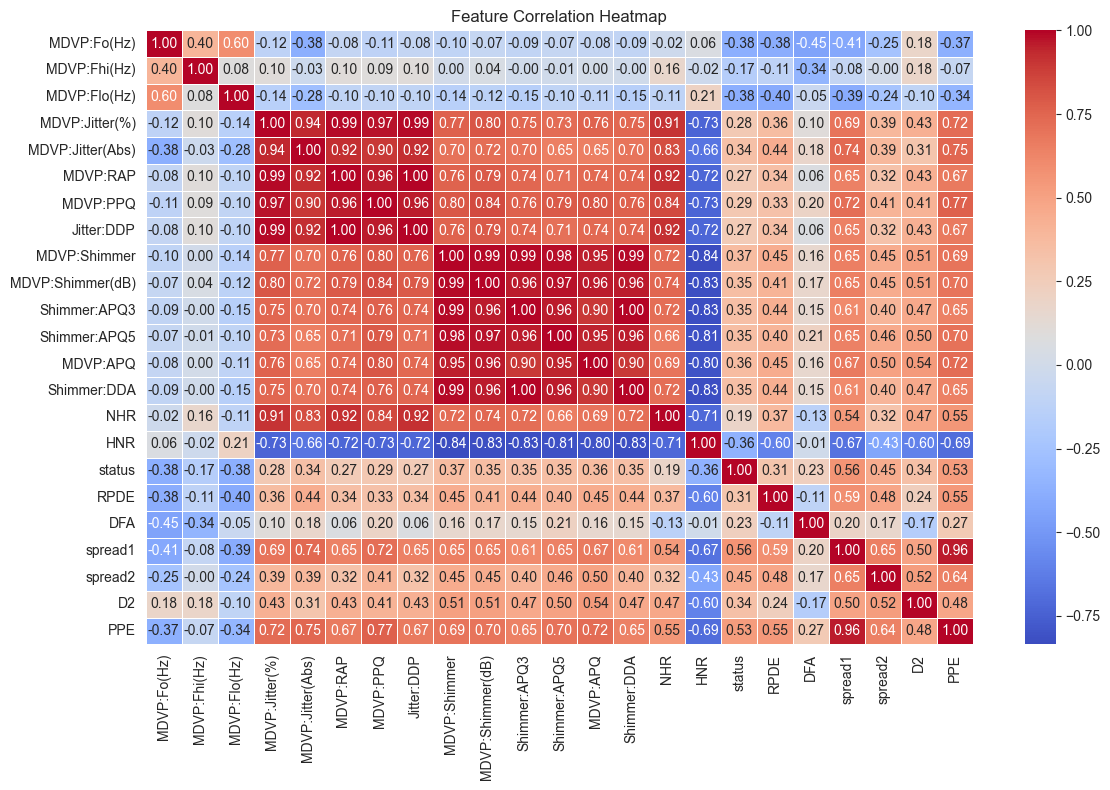

In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("parkinsons/parkinsons.data")

# Display the first few rows to understand the structure
print(df.head())

# Compute the correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Generate the heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

# Add a title
plt.title("Feature Correlation Heatmap")

# Show the heatmap
plt.tight_layout()
plt.show()
